<a href="https://colab.research.google.com/github/shreyasoddi/LGMVIP-data-science/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = '/content/NSE-TATAGLOBAL.csv'
data_train = pd.read_csv(url)
train_set = data_train.iloc[:, 1:2].values

In [4]:
data_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
dataclose = data_train['Close']
dataclose

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

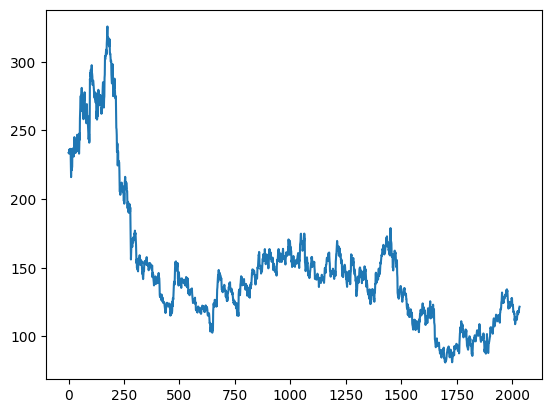

In [6]:
plt.plot(dataclose)

PREPROCESSING

normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler
SC = MinMaxScaler(feature_range = (0,1))
dataclose = SC.fit_transform(np.array(dataclose).reshape(-1,1))

In [8]:
dataclose.shape

(2035, 1)

SPLITTING THE TRAINING AND TESTING SET

In [9]:
training_size = int(len(dataclose) * 0.75)
test_size = len(dataclose - training_size)
train_data, test_data = dataclose[0:training_size,:], dataclose[training_size:len(dataclose),:1]

In [10]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

Reshape the input to be [samples,time steps,features]which is the requirement of LSTM

In [16]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

MODEL BUILDING

In [17]:
#create the LSTM model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 14s 302ms/step - loss: 0.0194 - val_loss: 0.0059
Epoch 2/100
23/23 [==============================] - 5s 212ms/step - loss: 0.0024 - val_loss: 8.5447e-04
Epoch 3/100
23/23 [==============================] - 6s 262ms/step - loss: 0.0016 - val_loss: 9.8680e-04
Epoch 4/100
23/23 [==============================] - 5s 213ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 6s 265ms/step - loss: 0.0014 - val_loss: 9.0750e-04
Epoch 6/100
23/23 [==============================] - 5s 214ms/step - loss: 0.0014 - val_loss: 9.0056e-04
Epoch 7/100
23/23 [==============================] - 6s 269ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 8/100
23/23 [==============================] - 5s 218ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
23/23 [==============================] - 5s 212ms/step - loss: 0.0011 - val_loss: 8.1381e-04
Epoch 10/100
23/23 [==============================] - 7s 315ms/step - 

In [21]:
#lets predict and check performance metrics
trainpredict = model.predict(x_train)
testpredict = model.predict(x_test)

13/13 [==============================] - 1s 64ms/step


In [22]:
#transform back to original form
trainpredict = SC.inverse_transform(trainpredict)
testpredict = SC.inverse_transform(testpredict)

In [23]:
##RMSE TRAIN DATA
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, trainpredict))

163.2205984669201

In [24]:
#RMSE TEST DATA
math.sqrt(mean_squared_error(y_test, testpredict))

105.84007188002539

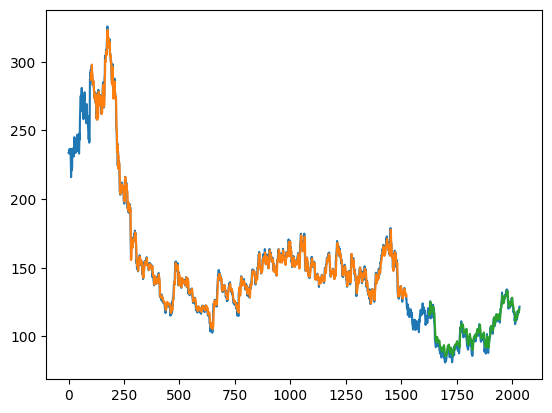

In [26]:
#plotting
#shift train prediction for plotting
look_back = 100
trainpredictplot = np.empty_like(dataclose)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(trainpredict) + look_back, :] = trainpredict

#shift test prediction for plotting
testpredictplot = np.empty_like(dataclose)
testpredictplot[:,:] = np.nan
testpredictplot[len(trainpredict) + (look_back * 2)+1:len(dataclose) - 1, :] = testpredict

#plot baseline and predictions
plt.plot(SC.inverse_transform(dataclose))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

STOCK PREDICTION FOR NEXT 30 DAYS

In [27]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [28]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [29]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [35]:
lst_output=[]
n_steps=100
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) 
        i=i+1

print(lst_output)         

0 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522

In [36]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [37]:
df = dataclose.tolist()
df.extend(lst_output)

In [38]:
len(dataclose)

2035

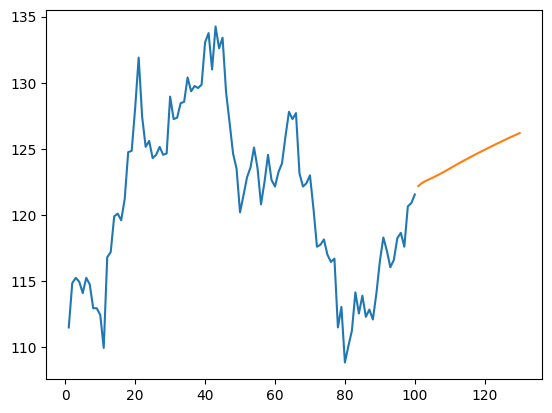

In [39]:
plt.plot(day_new, SC.inverse_transform(dataclose[1935:]))
plt.plot(day_pred, SC.inverse_transform(lst_output))